# L'Hopital's Rule

We have a limit of a quotient like

$$
\lim_{x \to a} \frac{f(x)}{g(x)}
$$

We can apply L'Hopital's rule to evaluate such limit.

![L'Hopital's Rule Flow Chart](l_hopital_flow.png)

But we should not be taking the derivative at the beginning.

![L'Hopital's Rule Flow Chart Mistake by Taking Derivative from the Beginning](l_hopital_flow_mistake.png)

Why? And why does it work?

## From 3Blue1Brown's Limit Lecture

[Limits | Essence of calculus, chapter 7](https://www.youtube.com/watch?v=kfF40MiS7zA)

Say we have studying the function $\frac{\sin(\pi x)}{x^2 - 1}$.

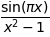

In [46]:
%matplotlib inline

from sympy import pi, sin, symbols, init_printing
from IPython.display import display

init_printing()

x = symbols('x')

numerator = sin(pi * x)
denominator = (x ** 2 - 1)
function = numerator / denominator

display(numerator)
display(denominator)
display(function)

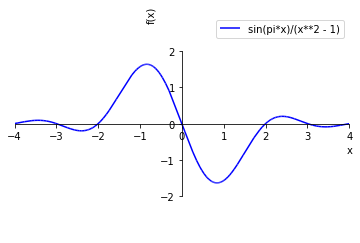

In [47]:
from sympy.plotting import plot

plot_kwargs = {
    'legend': True,
    'xlim': (-4, 4),
    'ylim': (-3, 3),
}

function_plot = plot(function, line_color='blue', **plot_kwargs)

The function looks pretty continuous. But if we plug in $x = \pm 1$, then $x^2 - 1 = 0$, hence the function is not defined at $x = \pm 1$.

However, as we approach to $x = \pm 1$, the function does appear to approach to a value. Hence $$\lim_{x \to -1} \frac{\sin(\pi x)}{x^2 - 1}$$ and $$\lim_{x \to 1} \frac{\sin(\pi x)}{x^2 - 1}$$ should exist.

So, what should the value be for, say, $$\lim_{x \to 1} \frac{\sin(\pi x)}{x^2 - 1}$$ ? Since we can't just plug in $x = 1$.

One way to approximate it is to plug in a value that is very close to it, say $0.00001$. And then we have $$\frac{\sin(\pi 1.00001)}{1.00001^2 - 1} = -1.5708...$$

But is there a more systematic process?

### Recall the limit definition of derivatives

$$
\begin{equation}
\frac{d f}{d x}(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h}
\end{equation}
$$

And here we can apply back derivatives to evaluate limits.

Let's plot the numerator $\sin(\pi x)$ and the denominator $x^2 - 1$ together with $\frac{\sin(\pi x)}{x^2 - 1}$.

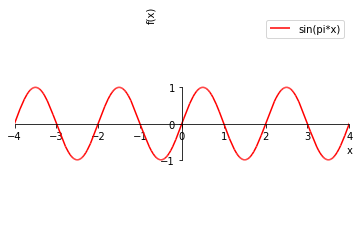

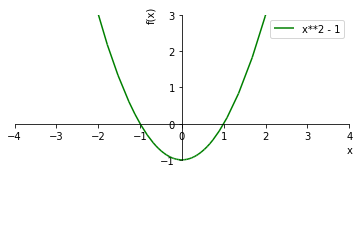

In [48]:
numerator_plot = plot(numerator, line_color='red', **plot_kwargs)
denominator_plot = plot(denominator, line_color='green', **plot_kwargs)

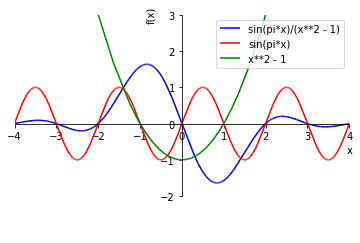

In [49]:
function_plot.extend(numerator_plot)
function_plot.extend(denominator_plot)

function_plot.show()

Let's zoom in around $x = 1$.

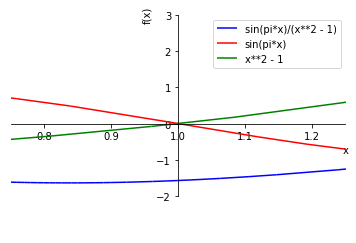

In [50]:
function_plot.xlim = (0.75, 1.25)
function_plot.show()

Both $\sin (\pi x)$ and $2 x^2 - 1$ are $0$ at $x = 1$.

If we nudge $d x$ away from 1, for $\sin(\pi x)$ we have the change of value being $d(\sin(pi x))$.

By applying the chain rule, we have $d(\sin(pi x)) = \cos(\pi x)(\pi) d x$.

Then we plug in $x = 1$ to this expression, we have $\cos(\pi x)(\pi) d x|_{x = 1} = \cos(\pi)(\pi) d x$.

And since $\cos(\pi)(\pi) = -\pi$, $d(\sin(\pi x))|_{x = 1} = -\pi d x$ at $x = 1$.

Similarly, $d(x^2 - 1) = 2 x d x$. Plugging in $x = 1$ we have $d(x^2 - 1) = 2 x d x = 2 d x$.

In the same spirit of approximating the limit by applying a very small value away from $1$, this means for value of x at a tiny nudge $d x$ away from $1$, we have
$$
\begin{equation}
\begin{split}
\lim_{x \to 1}\frac{\sin(\pi x)}{x^2 - 1} &\approx \frac{d(\sin(\pi x))}{d(x^2 - 1)} \\
&\approx \frac{- \pi d x}{2 d x} \\
&\approx - \frac{\pi}{2}
\end{split}
\end{equation}
$$.

As $d x$ gets smaller, the approximation gets more accurate.

### Generalize the idea

Say we have two function $f(x)$ and $g(x)$, which are both $0$ at $x = a$.

The only constraint we have to have is that both $f(x)$ and $g(x)$ need to be differentiable at $x = a$.

Which means both functions look like a line when we zoom in close to $x = a$.

1.0858524668483729


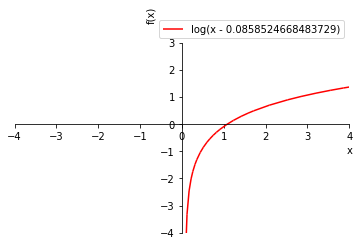

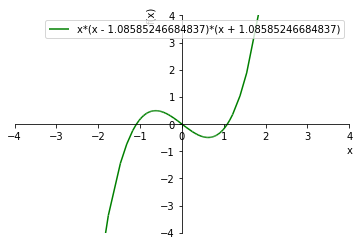

In [51]:
from sympy import ln, sqrt
from random import random

plot_kwargs = {
    'legend': True,
    'xlim': (-4, 4),
    'ylim': (-4, 4),
}

a = 1 + random()
print(a)
f = ln(x - (a - 1))
g = x * (x - a) * (x + a)

f_plot = plot(f, line_color='red', **plot_kwargs)
g_plot = plot(g, line_color='green', **plot_kwargs)

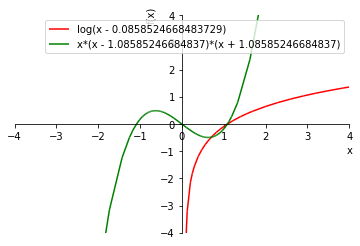

In [52]:
f_plot.extend(g_plot)
f_plot.show()

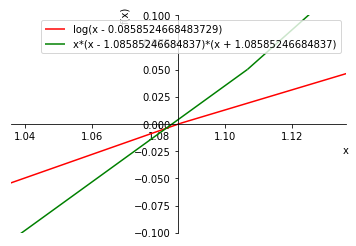

In [53]:
f_plot.xlim = (a - 0.05, a + 0.05)
f_plot.ylim = (-0.1, 0.1)
f_plot.show()

Even we cannot compute $\frac{f(x)}{g(x)}$ at $x = a$ as $g(a) = 0$, we can compute the $\frac{f(x)}{g(x)}$ at some x very very close to $a$, the limit of as $x$ approaches to $a$: $$\lim_{x \to a} \frac{f(x)}{g(x)}$$.

And it's helpful to think the $x$ is just $d x$ nudge from $a$.

And because both functions $f(x)$ and $g(x)$ are $0$, we can approximate that

$f(x + d x) \approx \frac{d f}{d x}(a) d x$.

Likewise,

$g(x + d x) \approx \frac{d g}{d x}(a) d x$.

The approximation get more precise as as $d x$ gets smaller,

$$
\begin{equation}
\begin{split}
\lim_{x \to a} \frac{f(x)}{g(x)} &= \frac{\frac{d f}{d x}(a) d x}{\frac{d g}{d x}(a) d x} \\
&= \frac{\frac{d f}{d x}(a)}{\frac{d g}{d x}(a)}
\end{split}
\end{equation}
$$.

## L'Hopital's Rule from Taylor's Perspective

$$
\begin{equation}
\lim_{x \to a} \frac{f(x)}{g(x)} = \frac{f(a) + \frac{d f}{d x}|_{a} (x - a) + \frac{1}{2!}\frac{d^2 f}{d x^2}_{a} (x - a)^2 + \frac{1}{3!}\frac{d^3 f}{d x^3}_{a} (x - a)^3 + ...}{g(a) + \frac{d g}{d x}|_{a} (x - a) + \frac{1}{2!}\frac{d^2 g}{d x^2}_{a} (x - a)^2 + \frac{1}{3!}\frac{d^3 g}{d x^3}_{a} (x - a)^3 + ...}
\end{equation}
$$

### The case of $\frac{0}{0}$

In the context of the L'Hopital's Rule, let's consider the $\frac{0}{0}$ case that both $f(a) = 0$ and $g(a) = 0$. That means both the zero-order terms in the numerator and the denominator both vanish, and then we can factor out the $(x - a)$ terms in both the numerator and the denominator.

$$
\begin{equation}
\begin{split}
\lim_{x \to a} \frac{f(x)}{g(x)} &= \frac{f(a) + \frac{d f}{d x}|_{a} (x - a) + \frac{1}{2!}\frac{d^2 f}{d x^2}|_{a} (x - a)^2 + \frac{1}{3!}\frac{d^3 f}{d x^3}|_{a} (x - a)^3 + ...}{g(a) + \frac{d g}{d x}|_{a} (x - a) + \frac{1}{2!}\frac{d^2 g}{d x^2}|_{a} (x - a)^2 + \frac{1}{3!}\frac{d^3 g}{d x^3}|_{a} (x - a)^3 + ...} \\
&= \frac{\frac{d f}{d x}|_{a} (x - a) + \frac{1}{2!}\frac{d^2 f}{d x^2}_{a} (x - a)^2 + \frac{1}{3!}\frac{d^3 f}{d x^3}|_{a} (x - a)^3 + ...}{\frac{d g}{d x}|_{a} (x - a) + \frac{1}{2!}\frac{d^2 g}{d x^2}|_{a} (x - a)^2 + \frac{1}{3!}\frac{d^3 g}{d x^3}|_{a} (x - a)^3 + ...} \\
&= \frac{\frac{d f}{d x}|_{a} + \frac{1}{2!}\frac{d^2 f}{d x^2}|_{a} (x - a) + \frac{1}{3!}\frac{d^3 f}{d x^3}|_{a} (x - a)^2 + ...}{\frac{d g}{d x}|_{a} + \frac{1}{2!}\frac{d^2 g}{d x^2}|_{a} (x - a) + \frac{1}{3!}\frac{d^3 g}{d x^3}|_{a} (x - a)^2 + ...}
\end{split}
\end{equation}
$$

...with ends up $\frac{d f}{d x}|_{a}$ as the leading order term in the numerator and $\frac{d g}{d x}|_{a}$ as the leading order term in the denominator.

If $\frac{d f}{d x}|_{a} = 0$ and also $\frac{d g}{d x}|_{a} = 0$, hence both leading order terms also vanish, then we will be able to factor out one more term of $(x - a)$.

$$
\begin{equation}
\begin{split}
\lim_{x \to a} \frac{f(x)}{g(x)} &= \frac{\frac{d f}{d x}|_{a} + \frac{1}{2!}\frac{d^2 f}{d x^2}|_{a} (x - a) + \frac{1}{3!}\frac{d^3 f}{d x^3}_{a} (x - a)^2 + ...}{\frac{d g}{d x}|_{a} + \frac{1}{2!}\frac{d^2 g}{d x^2}_{a} (x - a) + \frac{1}{3!}\frac{d^3 g}{d x^3}|_{a} (x - a)^2 + ...} \\
&= \frac{\frac{1}{2!}\frac{d^2 f}{d x^2}|_{a} (x - a) + \frac{1}{3!}\frac{d^3 f}{d x^3}|_{a} (x - a)^2 + ...}{\frac{1}{2!}\frac{d^2 g}{d x^2}|_{a} (x - a) + \frac{1}{3!}\frac{d^3 g}{d x^3}|_{a} (x - a)^2 + ...} \\
&= \frac{\frac{1}{2!}\frac{d^2 f}{d x^2}|_{a}+ \frac{1}{3!}\frac{d^3 f}{d x^3}|_{a} (x - a) + ...}{\frac{1}{2!}\frac{d^2 g}{d x^2}|_{a} + \frac{1}{3!}\frac{d^3 g}{d x^3}|_{a} (x - a) + ...}
\end{split}
\end{equation}
$$

And so on until we reach the $k$th derivative leading term where $\frac{d^k g}{d x^k} \neq 0$. In this form it is the derivatives that only matter.

### Examples

In some cases it's much easier to compute the limit by applying the L'Hopitals Rule, than a Taylor series.

$$\lim_{x \to 0}\frac{\tan x}{\arcsin x}$$

In this case the Taylor series form of the quotient can be hard to work with.

As $\tan 0 = 0$ and $\arcsin 0 = 0$, let's apply the L'Hopitals Rule.

$$
\begin{equation}
\begin{split}
\lim_{x \to 0}\frac{\tan x}{\arcsin x} &= \lim_{x \to 0}\frac{\frac{d}{d x} tan x}{\frac{d}{d x}\arcsin x} \\
&= \lim_{x \to 0} \frac{\sec^2 x}{(1 - x^2)^{-\frac{1}{2}}} \\
&= \frac{\lim_{x \to 0} \sec^2 x}{\lim_{x \to 0} (1 - x^2)^{-\frac{1}{2}}} \\
&= \frac{1}{1} \\
&= 1
\end{split}
\end{equation}
$$

In [54]:
## Verify with SymPy

from sympy import asin, limit, tan, symbols

x = symbols('x')

limit(tan(x) / asin(x), x, 0)

Sometimes, the Hopital's Rule does not make things easier...

$$
\lim_{x \to 0} \frac{x^2 \ln(\cos x)}{\sin^2(3 x^2)}
$$

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to 0} \frac{x^2 \ln(\cos x)}{\sin^2(3 x^2)} &= \lim_{x \to 0} \frac{\frac{d}{d x} (x^2 \ln(\cos x))}{\frac{d}{d x} \sin^2(3 x^2)} &\text{as it is $\frac{0}{0}$ case} \\
&= \lim_{x \to 0} \frac{(2 x \ln(\cos x))(x^2 \frac{1}{\cos x} (-\sin x))}{2 \sin(3 x^2) \cos(3 x^2) 6 x} \\
&= \lim_{x \to 0} \frac{-2 x^3 \tan x \ln(\cos x)}{12 x \sin(3 x^2) \cos(3 x^2)} \\
&= \lim_{x \to 0} \frac{-x^2 \tan x \ln(\cos x)}{6 \sin(3 x^2) \cos(3 x^2)} \\
&= \lim_{x \to 0} \frac{\frac{d}{d x} (-x^2 \tan x \ln(\cos x))}{\frac{d}{d x} (6 \sin(3 x^2) \cos(3 x^2))} &\text{as it is $\frac{0}{0}$ case} \\
&= \lim_{x \to 0} \frac{(-2 x)(\tan x \ln(\cos x) + (-x^2)(\sec^2 x \ln(\cos x) + \tan x (\frac{1}{\cos x}(-\sin x))))}{6(\cos(3 x^2) 6 x)(\cos(3 x^2) + (\sin(3 x^2))(-\sin(3 x^2) 6 x))} \\
&= \lim_{x \to 0} \frac{(-2 x)(\tan x \ln(\cos x) + (-x^2)(\sec^2 x \ln(\cos x) + \tan x (\frac{1}{\cos x}(-\sin x))))}{36 x (\cos^2(3 x^2) - \sin^2(3 x^2))} \\
...
\end{aligned}
\end{equation}
$$

...while it is easier to just apply Taylor's expansion. Recall that

$$
\begin{array}{}
\cos x &= 1 - \frac{1}{2!} x^2 + H.O.T. \\
\ln(1 + z) &= z + H.O.T. \\
\sin u &= u + H.O.T.
\end{array}
$$

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to 0} \frac{x^2 \ln(\cos x)}{\sin^2(3 x^2)} &= \frac{x^2 \ln(1 - (\frac{1}{2!} x^2 + H.O.T.))}{(3 x^2 + H.O.T.)^2} \\
&=\lim_{x \to 0} \frac{x^2 \ln(1 + (-\frac{1}{2!} x^2 + H.O.T.))}{(3 x^2 + H.O.T.)^2} \\
&= \lim_{x \to 0} \frac{x^2 (-\frac{1}{2!} x^2 + H.O.T.))}{(3 x^2 + H.O.T.)^2} \\
&= \lim_{x \to 0} \frac{x^2 (-\frac{1}{2!} x^2 + H.O.T.))}{9 x^4 + H.O.T.} \\
&= \lim_{x \to 0} \frac{-\frac{1}{2!} x^4 + H.O.T.}{9 x^4 + H.O.T.} \\
&= \lim_{x \to 0} \frac{-\frac{1}{2} + H.O.T.}{9 + H.O.T.} \\
&= \frac{\lim_{x \to 0}(-\frac{1}{2}) + \lim_{x \to 0} (H.O.T.)}{\lim_{x \to 0} 9 + \lim_{x \to 0} (H.O.T.)} \\
&= -\frac{1}{18}
\end{aligned}
\end{equation}
$$

Not all indeterminate limits look like $\frac{0}{0}$.

$$
\lim_{x \to 0} (\frac{1}{\sin^2 x} - \frac{1}{x^2})
$$

We first try to evaluate the limit by plugging in the value $x = 0$

$$
\begin{equation}
\lim_{x \to 0} (\frac{1}{\sin^2 x} - \frac{1}{x^2}) = \infty - \infty ?
\end{equation}
$$

...that's not going to work.

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to 0} (\frac{1}{\sin^2 x} - \frac{1}{x^2}) &= \lim_{x \to 0} \frac{x^2 - \sin^2 x}{x^2 \sin^2 x} \\
&= \lim_{x \to 0} \frac{\frac{d}{d x} (x^2 - \sin^2 x)}{\frac{d}{d x} (x^2 \sin^2 x)} & \text{as it is $\frac{0}{0}$ form} \\
&= \lim_{x \to 0} \frac{2 x - 2 \sin x \cos x}{(2 x \sin^2 x + x^2 2 \sin x \cos x)} \\
...
\end{aligned}
\end{equation}
$$

...which does not seem to make things much easier.

Alternatively, let's apply Taylor's expansion

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to 0} (\frac{1}{\sin^2 x} - \frac{1}{x^2}) &= \lim_{x \to 0} \frac{x^2 - \sin^2 x}{x^2 \sin^2 x} \\
&= \lim_{x \to 0} \frac{x^2 - (x - \frac{1}{3!} x^3 + H.O.T.)^2}{x^2 (x - \frac{1}{3!} x^3 + H.O.T.)^2} \\
&= \lim_{x \to 0} \frac{x^2 - ((x - \frac{1}{3!} x^3) + H.O.T.)^2}{x^2 ((x - \frac{1}{3!} x^3) + H.O.T.)^2} \\
&= \lim_{x \to 0} \frac{x^2 - (x - \frac{1}{3!} x^3))^2 + H.O.T.}{x^2 ((x - \frac{1}{3!} x^3))^2 + H.O.T.)} \\
&= \lim_{x \to 0} \frac{x^2 - x^2 + 2 \frac{1}{3!} x^4 + H.O.T.}{x^4 + H.O.T.} & \text{as we only care about the leading terms} \\
&= \lim_{x \to 0} \frac{2 \frac{1}{3!} x^4 + H.O.T.}{x^4 + H.O.T.} \\
&= \lim_{x \to 0} \frac{\frac{1}{3} + H.O.T.}{1 + H.O.T.} \\
&= \frac{\lim_{x \to 0} (\frac{1}{3} + H.O.T.)}{\lim_{x \to 0}(1 + H.O.T.)} \\
&= \frac{\frac{1}{3} + \lim_{x \to 0} (H.O.T.)}{1 + \lim_{x \to 0} (H.O.T.)} \\
&= \frac{1}{3}
\end{aligned}
\end{equation}
$$


In [55]:
### Verify with SymPy

limit(1 / (sin(x) ** 2) - 1 / (x ** 2), x, 0)

$$
\lim_{x \to 0^+} x \ln x
$$

We need to be careful as this is a one-sided limit.

We first try to evaluate the limit by plugging in $x = 0^+$.

$$
\begin{equation}
\lim_{x \to 0^+} x \ln x = 0 (-\infty) ?
\end{equation}
$$

...that's not going to work.

We can start with constructing a quotient from the original form of the limit

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to 0^+} x \ln x &= \lim_{x \to 0^+} \frac{\ln x}{x^{-1}} & \text{so that we have a quotient of two functions} \\
&= \lim_{x \to 0^+} \frac{x^{-1}}{-x^{-2}} & \text{as both $\lim_{x \to 0} \ln x = \infty$ and $\lim_{x \to 0} x^{-1} = \infty$} \\
&= \lim_{x \to 0^+} - \frac{x}{x^{-1}} \\
&=\lim_{x \to 0^+} -x \\
&= 0
\end{aligned}
\end{equation}
$$

In [56]:
### Verify with SymPy

limit(x * ln(x), x, 0, '+')

Sometimes the L'Hopital's Rule helps evaluating limits at infinity.

$$
\lim_{x \to \infty} \frac{\ln x}{\sqrt{x}}
$$

Both $$\lim_{x \to \infty} \ln x = \infty$$ and $$\lim_{x \to \infty} \sqrt x = \infty$$. But they approach $\infty$ at different rates.

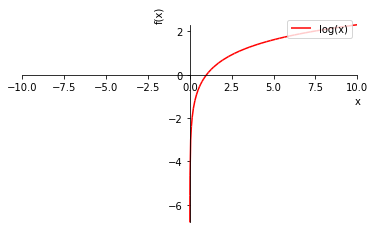

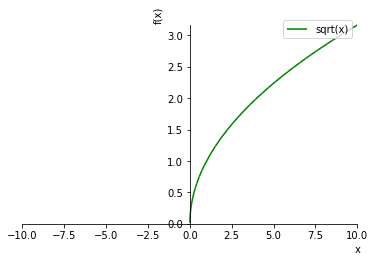

In [57]:
from sympy import sqrt

numerator = ln(x)
denominator = sqrt(x)

ln_plot = plot(numerator, line_color='red', legend=True)
sqrt_plot = plot(denominator, line_color='green', legend=True)

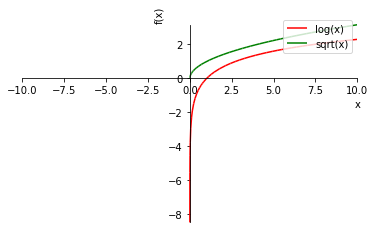

In [58]:
ln_plot.extend(sqrt_plot)
ln_plot.show()

Let's apply L'Hopital's Rule

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to \infty} \frac{\ln x}{\sqrt{x}} &= \lim_{x \to \infty} \frac{x^{-1}}{\frac{1}{2}x^{-\frac{1}{2}}} \\
&= \lim_{x \to \infty} \frac{x^{- \frac{1}{2}}}{\frac{1}{2}} \\
&= \lim_{x \to \infty} 2 x^{- \frac{1}{2}} \\
&= 0
\end{aligned}
\end{equation}
$$

In [59]:
## Verify with SymPy

from sympy import oo

limit(ln(x)/ sqrt(x), x, oo)

But what does that really mean?

It means although both the limit of the numerator and the denominator is $\infty$ as $x \to \infty$, the rate of growth of the denominator dominates the rate of growth of the numerator.

Hence $\sqrt x$ dominates $\ln x$ as $x \to \infty$.

### Limiation of the L'Hopital's Rule

$$
\lim_{x \to \infty} \tanh
$$

Let's try to compute the limit by applying the L'Hopital's Rule.

$$
\begin{equation}
\begin{aligned}
\lim_{x \to \infty} \tanh &= \lim_{x \to \infty} \frac{\sinh x}{\cosh x} \\
&= \lim_{x \to \infty} \frac{\frac{d}{d x} \sinh x}{\frac{d}{d x} \cosh x} \\
&= \lim_{x \to \infty} \frac{\cosh x}{\sinh x} \\
&= \lim_{x \to \infty} \frac{\frac{d}{d x} \cosh x}{\frac{d}{d x}\sinh x} \\
&= \lim_{x \to \infty} \frac{\sinh x}{\cosh x} \\
&= ...
\end{aligned}
\end{equation}
$$

...which is not getting anywhere.

However, we know that $\sinh x = \frac{e^x - e^{-x}}{2}$, and $\cosh = \frac{e^x + e^{-x}}{2}$, hence

$$
\begin{equation}
\begin{aligned}
\lim_{x \to \infty} \tanh &= \lim_{x \to \infty} \frac{\sinh x}{\cosh x} \\
&= \lim_{x \to \infty} \frac{e^x - e^{-x}}{e^x + e^{-x}} \\
&= \lim_{x \to \infty} \frac{e^x(1 - e^{-2 x})}{e^x(1 + e^{-2 x})} \\
&= \lim_{x \to \infty} \frac{1 - e^{-2 x}}{1 + e^{-2 x}} \\
&= 1
\end{aligned}
\end{equation}
$$


Consider

$$
\lim_{x \to \infty} \frac{x \ln x}{\ln(\cosh x)}
$$

By applying the L'Hopital's Rule

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to \infty} \frac{x \ln x}{\ln(\cosh x)} &= \lim_{x \to \infty} \frac{\frac{d}{d x} (x \ln x)}{\frac{d}{d x} \ln(\cosh x)} \\
&= \lim_{x \to \infty} \frac{\ln x + x \frac{1}{x}}{\frac{1}{\cosh x} \sinh x} \\
&= \lim_{x \to \infty} \frac{1 + \ln x}{\tanh x} \\
&= \frac{\infty}{1} \\
&= \infty
\end{aligned}
\end{equation}
$$


We can also compute without applying the L'Hopital's Rule

$$
\begin{equation}
\begin{aligned}{}
\lim_{x \to \infty} \frac{x \ln x}{\ln(\cosh x)} &= \lim_{x \to \infty} \frac{x \ln x}{\ln(\frac{e^x + e^{-x}}{2})} \\
&= \lim_{x \to \infty} \frac{x \ln x}{\ln(e^x + e^{-x}) - \ln(2)} \\
&= \lim_{x \to \infty} \frac{x \ln x}{\ln(e^x) - \ln(2)} & \text{as $\lim_{x \to \infty} e^{-x} = 0$} \\
&= \lim_{x \to \infty} \frac{x \ln x}{x - \ln(2)} \\
&=  \lim_{x \to \infty} \ln x \frac{x}{x - \ln(2)} \\
&= \infty
\end{aligned}
\end{equation}
$$


In [60]:
### Verify with SymPy

from sympy import cosh

limit(x * ln(x) / ln(cosh(x)), x, oo)

Foreshadowing: We need a language for controlling growth...The big $O$